## **Load Dataset**

In [33]:
import pandas as pd
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Exploratory Data Analysis**



In [35]:
print("DataFrame Info:")
df.info()

print("\nDataFrame Shape:")
print(df.shape)

print("\nMissing values per column:")
print(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

DataFrame Shape:
(5110, 12)

Missing values per column:
id                     0
gender                 0
age                    0
hypertens

In [36]:
print("Distribution of 'stroke' variable:")
print(df['stroke'].value_counts())

Distribution of 'stroke' variable:
stroke
0    4861
1     249
Name: count, dtype: int64


/tmp/ipython-input-661681161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='viridis')


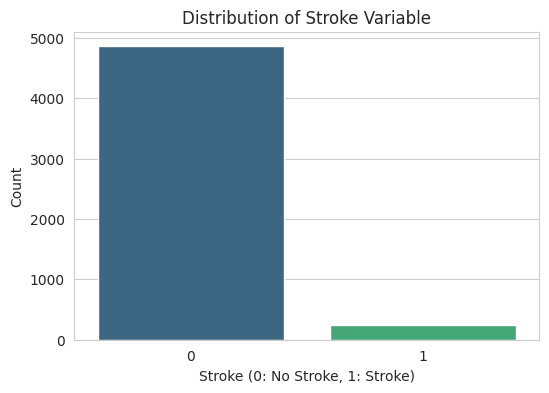

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, palette='viridis')
plt.title('Distribution of Stroke Variable')
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Count')
plt.show()


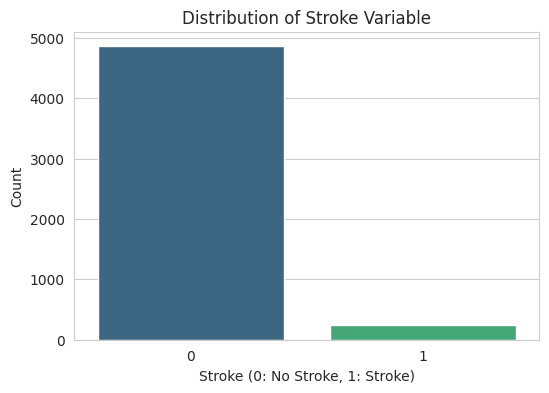

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, palette='viridis', hue='stroke', legend=False)
plt.title('Distribution of Stroke Variable')
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Count')
plt.show()


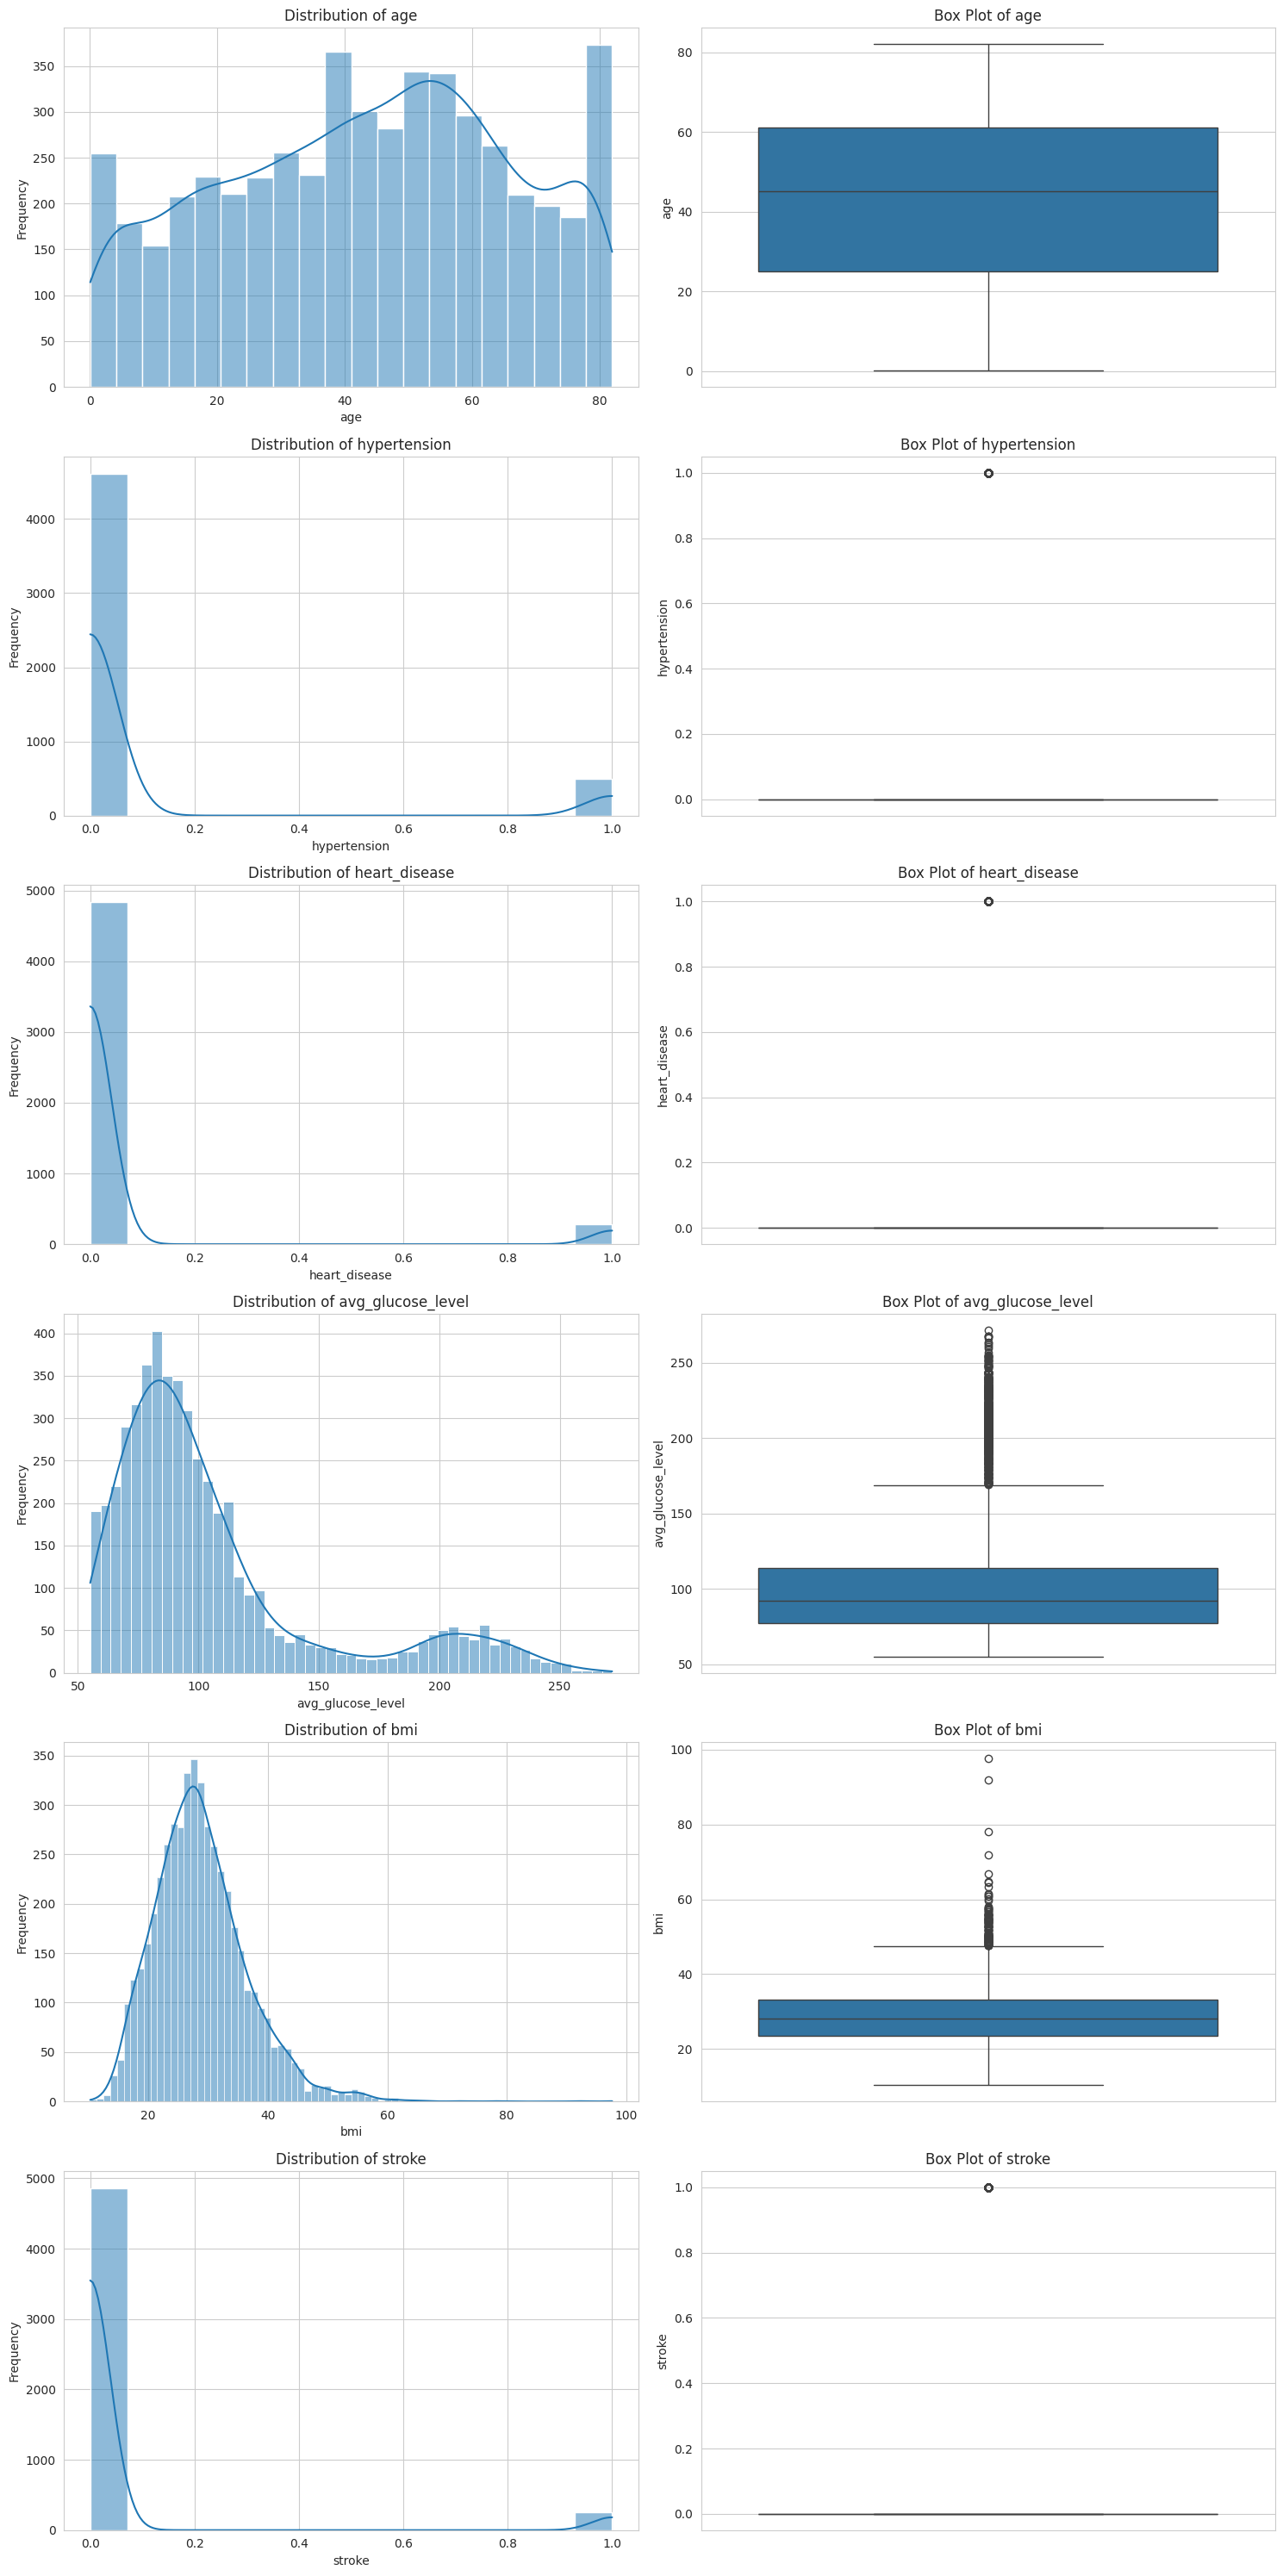

In [39]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Exclude 'id' as it's not a feature for distribution analysis
if 'id' in numerical_cols:
    numerical_cols.remove('id')

plt.figure(figsize=(15, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    # Histogram
    plt.subplot(len(numerical_cols), 2, 2*i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(len(numerical_cols), 2, 2*i + 2)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


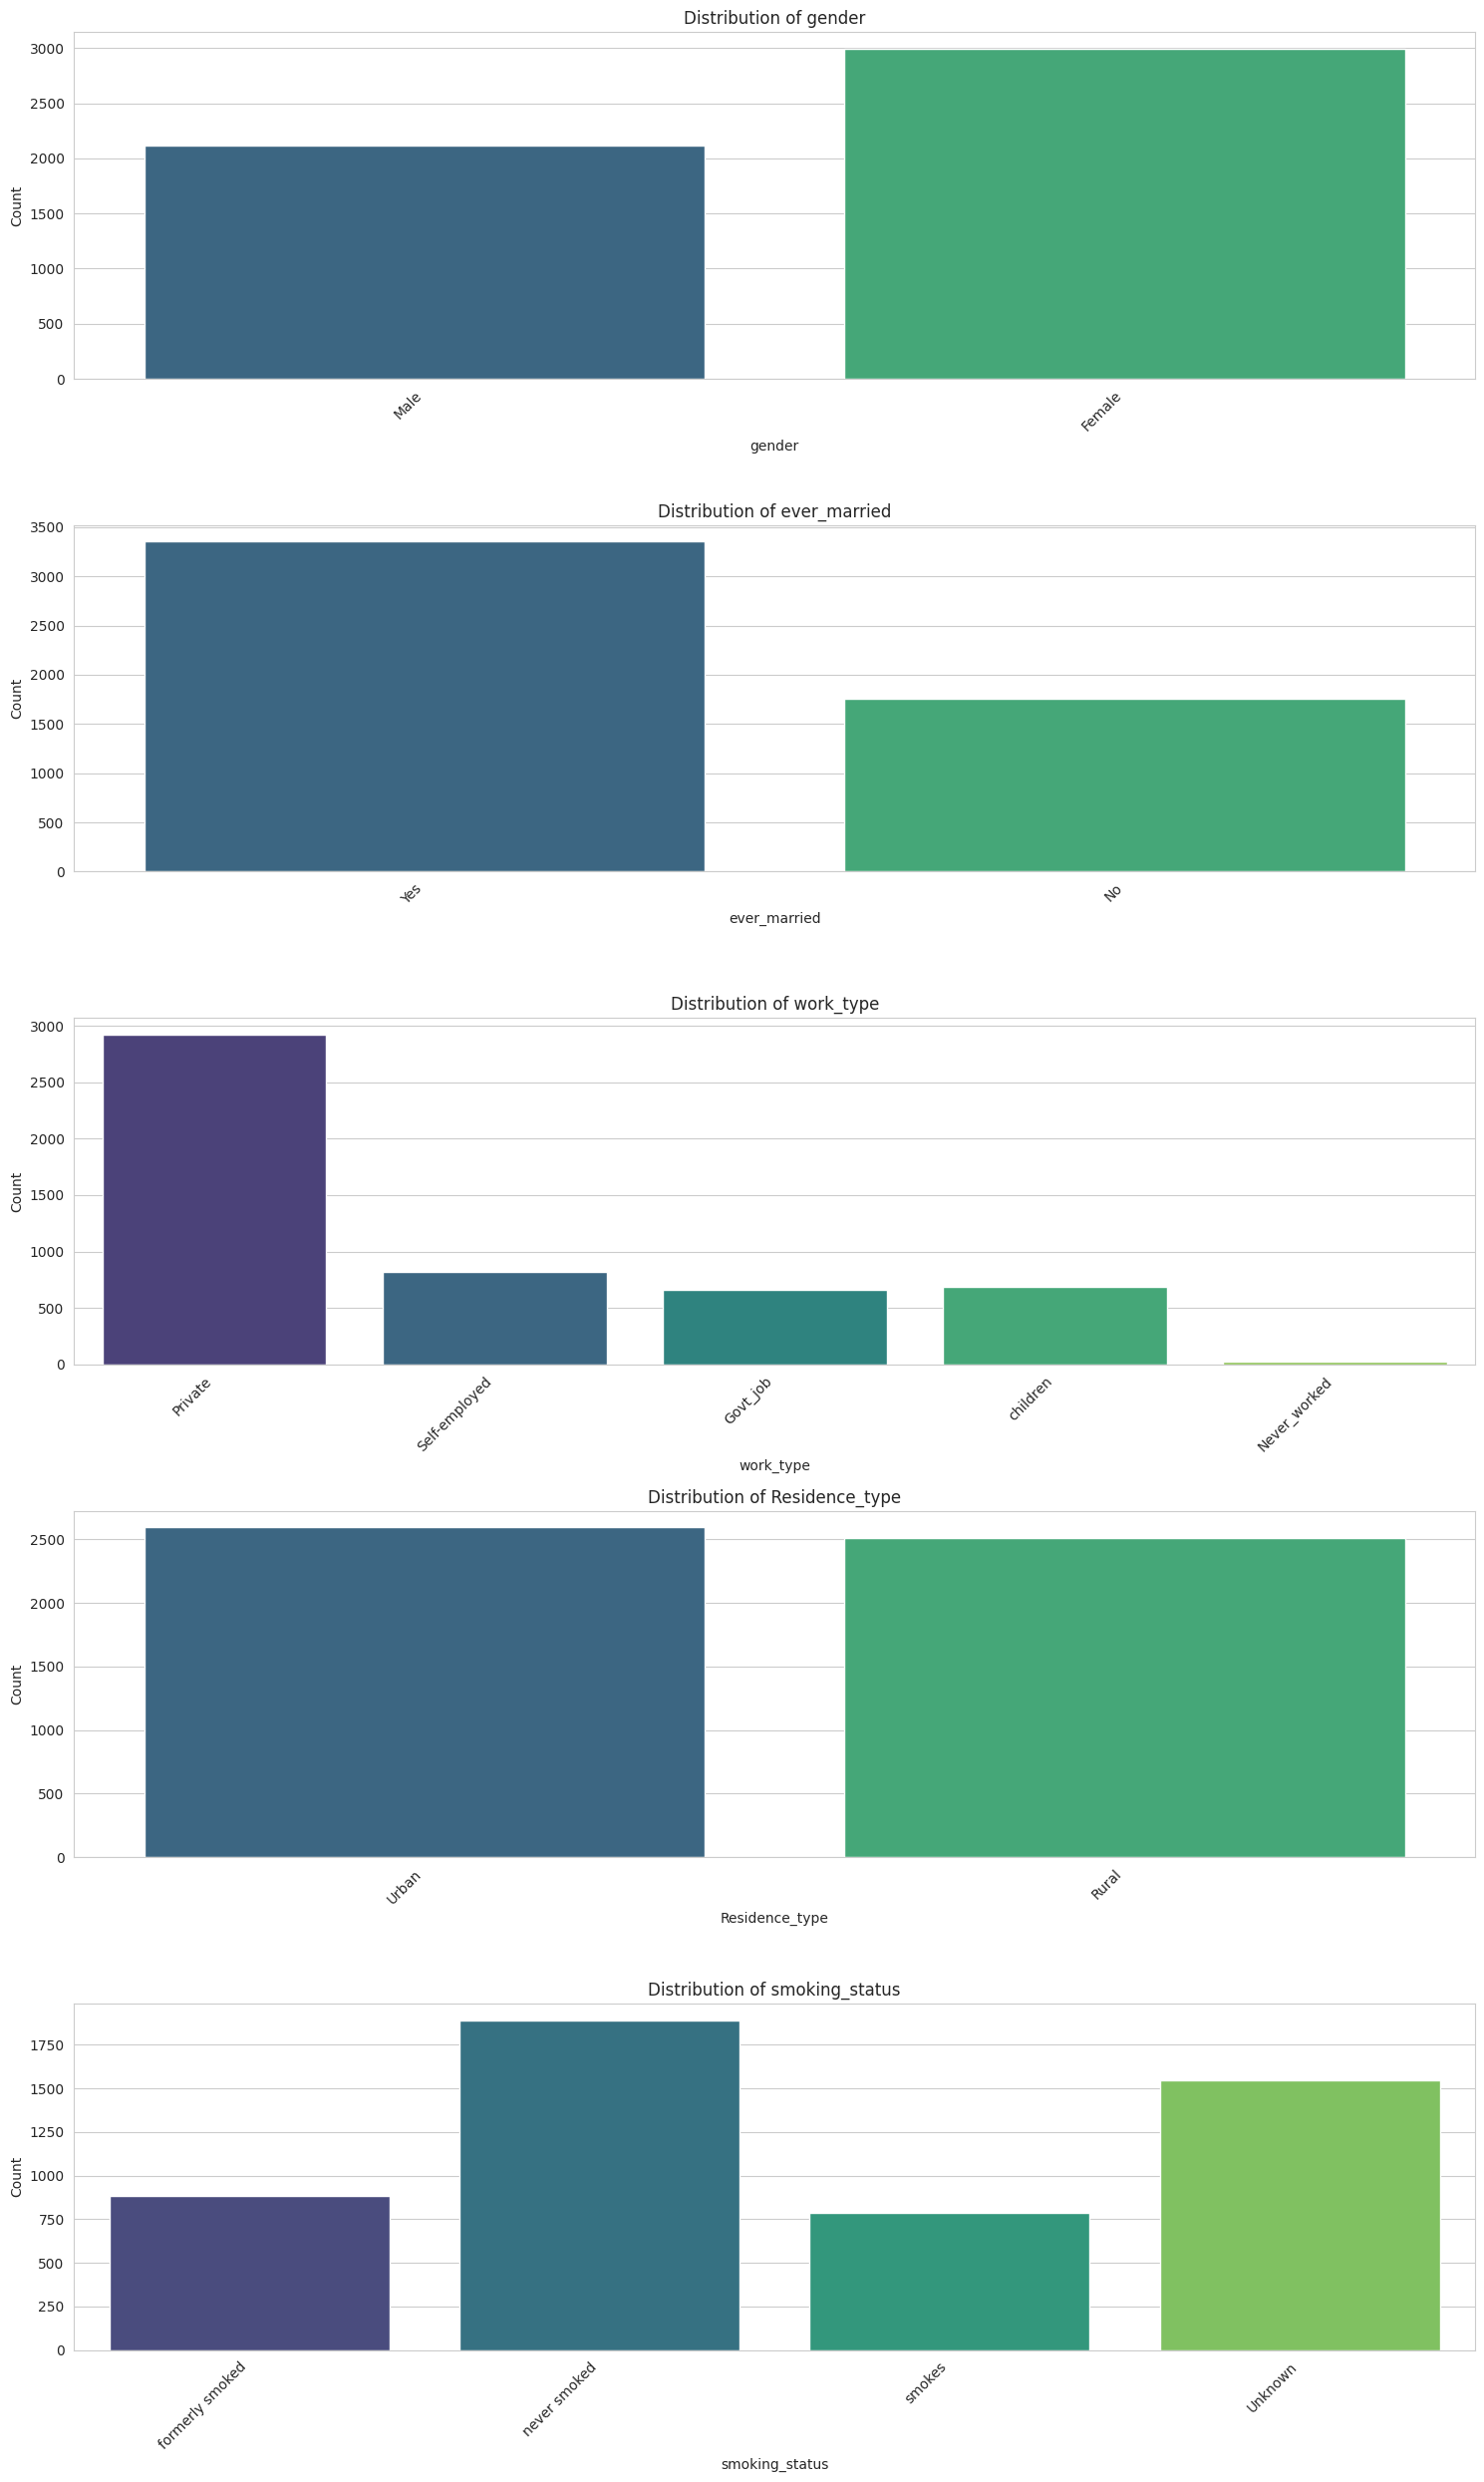

In [40]:
df = df[df['gender'] != 'Other']

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Exclude 'id' and 'stroke' as they are not categorical features for this visualization
# 'stroke' is int64, so it won't be in object dtype selection. 'id' is int64.

plt.figure(figsize=(15, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.countplot(x=col, data=df, palette='viridis', hue=col, legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

### Data Analysis Key Findings

*   The dataset contains 5110 entries and 12 columns, comprising numerical and categorical  data types.
*   The bmi column is the only one with missing values, specifically 201 entries. All other columns are complete.
*   A significant class imbalance exists in the target variable 'stroke': 4861 instances are '0' (no stroke) compared to only 249 instances are '1' (stroke).
*   Distributions for numerical features (e.g., 'age', 'avg\_glucose\_level', 'bmi') and categorical features (e.g., 'gender', 'ever\_married', 'work\_type') were visualized through histograms, box plots, and count plots, revealing their spread and frequency.
*   The 'Other' category in the 'gender' column was removed before visualizing categorical distributions.

### Insights or Next Steps

*   The 201 missing values in the bmi column need to be handled, likely through imputation, before model training. Furthermore, the severe class imbalance in the 'stroke' target variable (4861 vs. 249) must be addressed using techniques like oversampling, undersampling, or synthetic data generation (SMOTE) to prevent biased model performance.
*  Categorical features will require encoding (e.g., one-hot encoding or label encoding) for machine learning models. Further investigation into potential outliers observed in numerical features via box plots may be warranted to determine if they are data errors or genuine extreme values requiring specific treatment.


## **Data Cleaning and Preprocessing**


In [46]:
# Handle Missing Values (BMI Imputation)
bmi_median = df['bmi'].median()
df['bmi'].fillna(bmi_median, inplace=True)

print(f"Median BMI used for imputation: {bmi_median}")
print("Missing values in 'bmi' after imputation:")
print(df['bmi'].isnull().sum())

Median BMI used for imputation: 28.1
Missing values in 'bmi' after imputation:
0


/tmp/ipython-input-1733569811.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(bmi_median, inplace=True)


In [48]:
bmi_median = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(bmi_median)

print(f"Median BMI used for imputation: {bmi_median}")
print("Missing values in 'bmi' after imputation:")
print(df['bmi'].isnull().sum())

Median BMI used for imputation: 28.1
Missing values in 'bmi' after imputation:
0


In [58]:
#Encode Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame shape after one-hot encoding:")
print(df.shape)
print("\nFirst 5 rows of DataFrame after one-hot encoding:")
print(df.head())

DataFrame shape after one-hot encoding:
(5109, 17)

First 5 rows of DataFrame after one-hot encoding:
      id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   9046  67.0             0              1             228.69  36.6       1   
1  51676  61.0             0              0             202.21  28.1       1   
2  31112  80.0             0              1             105.92  32.5       1   
3  60182  49.0             0              0             171.23  34.4       1   
4   1665  79.0             1              0             174.12  24.0       1   

   gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0         True              True                   False               True   
1        False              True                   False              False   
2         True              True                   False               True   
3        False              True                   False               True   
4        False        

In [59]:
# Handle Outliers (Optional Capping/Transformation)
df_processed = df.drop('id', axis=1)

# Identify numerical columns for standardization and potential outlier treatment
# Exclude 'stroke' as it is the target variable
numerical_features = ['age', 'avg_glucose_level', 'bmi']

print("DataFrame columns after dropping 'id':")
print(df_processed.columns)
print(f"\nNumerical features for standardization and outlier treatment: {numerical_features}")

DataFrame columns after dropping 'id':
Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

Numerical features for standardization and outlier treatment: ['age', 'avg_glucose_level', 'bmi']


In [60]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

print("DataFrame head after standardization of numerical features:")
print(df_processed[numerical_features].head())

DataFrame head after standardization of numerical features:
        age  avg_glucose_level       bmi
0  1.051242           2.706450  1.004893
1  0.785889           2.121652 -0.099142
2  1.626174          -0.004867  0.472358
3  0.255182           1.437473  0.719142
4  1.581949           1.501297 -0.631677


In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_processed.drop('stroke', axis=1)
y = df_processed['stroke']

# Split data into training and testing sets before applying SMOTE to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training target distribution:")
print(y_train.value_counts())
print("\nResampled training target distribution:")
print(y_train_resampled.value_counts())
print("\nShape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

Original training target distribution:
stroke
0    3888
1     199
Name: count, dtype: int64

Resampled training target distribution:
stroke
0    3888
1    3888
Name: count, dtype: int64

Shape of X_train_resampled: (7776, 15)
Shape of y_train_resampled: (7776,)


## Feature Extraction


In [62]:
df_processed['glucose_bmi_ratio'] = df_processed['avg_glucose_level'] / df_processed['bmi']
numerical_features.append('glucose_bmi_ratio')

print("DataFrame head after adding 'glucose_bmi_ratio':")
print(df_processed.head())

DataFrame head after adding 'glucose_bmi_ratio':
        age  hypertension  heart_disease  avg_glucose_level       bmi  stroke  \
0  1.051242             0              1           2.706450  1.004893       1   
1  0.785889             0              0           2.121652 -0.099142       1   
2  1.626174             0              1          -0.004867  0.472358       1   
3  0.255182             0              0           1.437473  0.719142       1   
4  1.581949             1              0           1.501297 -0.631677       1   

   gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0         True              True                   False               True   
1        False              True                   False              False   
2         True              True                   False               True   
3        False              True                   False               True   
4        False              True                   False             

In [57]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a pandas Series of feature importances
feature_importances_series = pd.Series(feature_importances, index=X_train_resampled.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Print sorted feature importances
print("Sorted Feature Importances:")
print(sorted_feature_importances)


Sorted Feature Importances:
age                               0.393570
avg_glucose_level                 0.173289
bmi                               0.171642
ever_married_Yes                  0.055758
Residence_type_Urban              0.025380
work_type_Private                 0.024307
work_type_Self-employed           0.023918
gender_Male                       0.023016
smoking_status_formerly smoked    0.021977
smoking_status_never smoked       0.019730
hypertension                      0.019057
smoking_status_smokes             0.017655
work_type_children                0.016120
heart_disease                     0.014499
work_type_Never_worked            0.000081
dtype: float64


# **Model Training**


**Support Vector Classifier (SVC)**

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize SVC model
svc = SVC(random_state=42, probability=True)
# Initialize GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc,
                               param_grid=param_grid_svm,
                               scoring='f1',
                               cv=5,
                               n_jobs=-1,
                               verbose=2)

# Fit GridSearchCV to the resampled training data
grid_search_svc.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and best score
print("Best Hyperparameters for SVC:", grid_search_svc.best_params_)
print("Best Cross-validation Accuracy for SVC:", grid_search_svc.best_score_)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Accuracy for SVC: 0.9078000927232747


**Logistic Regression**

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define Logistic Regression Hyperparameter Grid
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Instantiate Logistic Regression model with a fixed random state
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Initialize GridSearchCV
log_reg_grid_search = GridSearchCV(estimator=log_reg_model,
                                   param_grid=log_reg_param_grid,
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1, verbose=1)

# Fit GridSearchCV to the scaled training data
log_reg_grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and best score
print("Best Hyperparameters for Logistic Regression:", log_reg_grid_search.best_params_)
print("Best Cross-validation Accuracy for Logistic Regression:", log_reg_grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters for Logistic Regression: {'C': 0.01, 'solver': 'lbfgs'}
Best Cross-validation Accuracy for Logistic Regression: 0.7923117235222643


**Decision Tree**

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define Decision Tree Hyperparameter Grid
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Instantiate Decision Tree model with a fixed random state
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt_model,
                              param_grid=dt_param_grid,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1, verbose=1)

# Fit GridSearchCV to the scaled training data
dt_grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters for Decision Tree:", dt_grid_search.best_params_)
# Print the best cross-validation accuracy score
print("Best Cross-validation Accuracy for Decision Tree:", dt_grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters for Decision Tree: {'max_depth': 20, 'min_samples_split': 2}
Best Cross-validation Accuracy for Decision Tree: 0.8981529025698674


**Random Forest**

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define Random Forest Hyperparameter Grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

# Instantiate Random Forest model with a fixed random state
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model,
                              param_grid=rf_param_grid,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1, verbose=1)

# Fit GridSearchCV to the scaled training data
rf_grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:", rf_grid_search.best_params_)
# Print the best cross-validation accuracy score
print("Best Cross-validation Accuracy for Random Forest:", rf_grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Best Cross-validation Accuracy for Random Forest: 0.9396883756685044


#**Evaluasi Model**

**Support Vector Classifier**


SVC Model Evaluation
Accuracy: 0.8307
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       972
           1       0.10      0.32      0.16        50

    accuracy                           0.83      1022
   macro avg       0.53      0.59      0.53      1022
weighted avg       0.92      0.83      0.87      1022



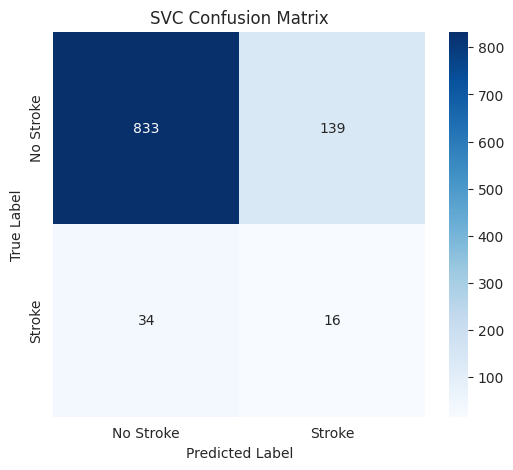

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate SVC Model
print("\nSVC Model Evaluation")
# Retrieve the best estimator
best_svc_model = grid_search_svc.best_estimator_

# Make predictions on the test data
# Define y_pred_svc if it's not already defined from previous cells
svc_predictions = best_svc_model.predict(X_test)

# Calculate and print accuracy
svc_accuracy = accuracy_score(y_test, svc_predictions)
print(f"Accuracy: {svc_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, svc_predictions))

# Compute and display confusion matrix
svc_cm = confusion_matrix(y_test, svc_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Logistic Regression**


Logistic Regression Evaluation
Accuracy: 0.7476
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.78      0.23        50

    accuracy                           0.75      1022
   macro avg       0.56      0.76      0.54      1022
weighted avg       0.94      0.75      0.82      1022



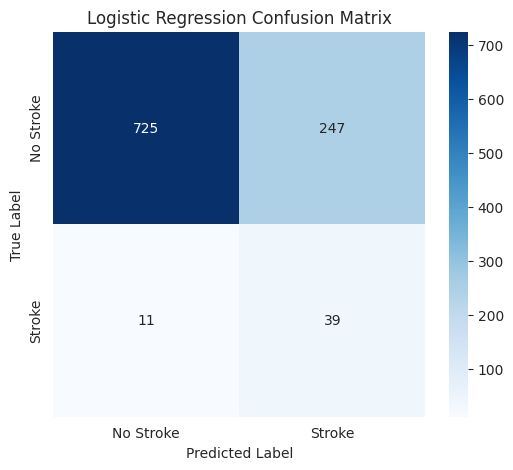

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Logistic Regression Model
print("\nLogistic Regression Evaluation")
# Retrieve the best estimator
best_log_reg_model = log_reg_grid_search.best_estimator_

# Make predictions on the scaled test data
log_reg_predictions = best_log_reg_model.predict(X_test)

# Calculate and print accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f"Accuracy: {log_reg_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, log_reg_predictions))

# Compute and display confusion matrix
log_reg_cm = confusion_matrix(y_test, log_reg_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Decision Tree**


Decision Tree Evaluation 
Accuracy: 0.8738
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.14      0.30      0.19        50

    accuracy                           0.87      1022
   macro avg       0.55      0.60      0.56      1022
weighted avg       0.92      0.87      0.90      1022



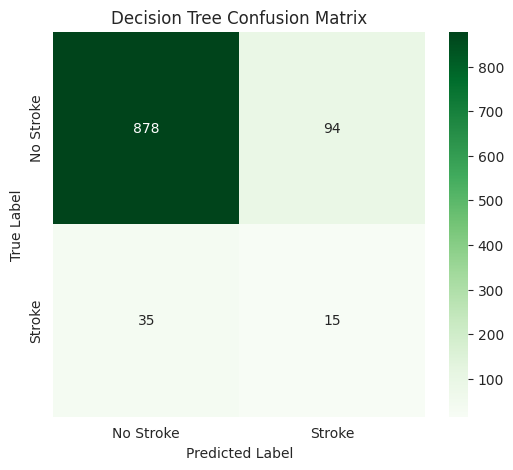

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Decision Tree Model
print("\nDecision Tree Evaluation ")
# Retrieve the best estimator
best_dt_model = dt_grid_search.best_estimator_

# Make predictions on the scaled test data
dt_predictions = best_dt_model.predict(X_test)

# Calculate and print accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Accuracy: {dt_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, dt_predictions))

# Compute and display confusion matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Random Forest**


Random Forest Evaluation
Accuracy: 0.8836
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.14      0.26      0.18        50

    accuracy                           0.88      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.92      0.88      0.90      1022



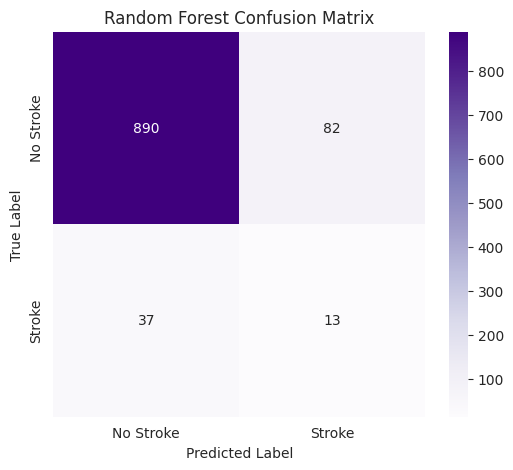

In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Random Forest Model
print("\nRandom Forest Evaluation")
# Retrieve the best estimator
best_rf_model = rf_grid_search.best_estimator_

# Make predictions on the scaled test data
rf_predictions = best_rf_model.predict(X_test)

# Calculate and print accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy: {rf_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Compute and display confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()